# Introduction to ML packages (part 1)

This tutorial is designed to provide a bird's eye view of the ML packages landscape.
The goal is not to give an in-depth explanation of all the features of each packages, but rather demonstrate the purpose of a few widely used ML packages. For more details, we refer the reader to the packages' documentation and other online tutorials.

## Jupyter

Jupyter is not strictly speaking an ML package. It provides a browser front-end connected to an instance of IPython which allows REPL for quick testing, allows to create documents that intertwines code, output, images, and text. This is great for prototyping, demonstrations and tutorials, but terrible for actual coding. 

In [1]:
6*7

In [2]:
def tokenize(text):
    return text.split(" ")

In [3]:
text = "In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley"
print(tokenize(text))

## Numpy

In [4]:
import numpy as np

Numpy is desiged to handle large multidimensional arrays and enable efficient computations with them. In the back, it runs pre-compiled C code which is much faster than, say, a Python `for` loop

In the Numpy tutorial, we have covered the basics of Numpy, numpy arrays, element-wise operations, matrices operations and generating random matrices. 
In this section, we'll cover indexing, slicing and broadcasting, which are useful concepts that will be reused in `Pandas` and `PyTorch`.


### Indexing and slicing

Numpy arrays can be indexed and sliced like regular python arrays

In [5]:
a_py = [1, 2, 3, 4, 5, 6, 7, 8, 9]
a_np = np.array(a_py)

In [6]:
print(a_py[3:7:2], a_np[3:7:2])
print(a_py[2:-1:2], a_np[2:-1:2])
print(a_py[::-1], a_np[::-1])

[4, 6] [4 6]
[3, 5, 7] [3 5 7]
[9, 8, 7, 6, 5, 4, 3, 2, 1] [9 8 7 6 5 4 3 2 1]


But you can also use arrays to index other arrays

In [7]:
idx = np.array([7,2])
a_np[idx]

array([8, 3])

In [8]:
# a_py[idx]

Which allows convenient querying, reindexing and even sorting

In [9]:
ages = np.random.randint(low=30, high=60, size=10)
heights = np.random.randint(low=150, high=210, size=10)

print(ages)
print(heights)

[32 59 40 39 41 31 49 42 47 32]
[172 156 191 207 173 175 182 207 182 198]


In [10]:
print(ages < 50)

[ True False  True  True  True  True  True  True  True  True]


In [11]:
print(heights[ages < 50])
print(ages[ages < 50])

[172 191 207 173 175 182 207 182 198]
[32 40 39 41 31 49 42 47 32]


In [12]:
shuffled_idx = np.random.permutation(10)
print(shuffled_idx)
print(ages[shuffled_idx])
print(heights[shuffled_idx])

[3 4 8 5 9 0 6 7 2 1]
[39 41 47 31 32 32 49 42 40 59]
[207 173 182 175 198 172 182 207 191 156]


In [13]:
sorted_idx = np.argsort(ages)
print(sorted_idx)
print(ages[sorted_idx])
print(heights[sorted_idx])

[5 0 9 3 2 4 7 8 6 1]
[31 32 32 39 40 41 42 47 49 59]
[175 172 198 207 191 173 207 182 182 156]


### Broadcasting

When Numpy is asked to perform an operation between arrays of differents sizes, it "broadcasts" the smaller one to the bigger one.

In [14]:
a = np.array([4, 5, 6])
b = np.array([2, 2, 2])
a * b

array([ 8, 10, 12])

In [15]:
a = np.array([4, 5, 6])
b = 2
a * b

array([ 8, 10, 12])

The two snippets of code above are equivalent but the second is easier to read and also more efficient.

In [16]:
a = np.arange(10).reshape(1,10)
b = np.arange(12).reshape(12,1)

In [17]:
print(a)
print(b)

[[0 1 2 3 4 5 6 7 8 9]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


In [18]:
print(a * b)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]
 [ 0 10 20 30 40 50 60 70 80 90]
 [ 0 11 22 33 44 55 66 77 88 99]]


## Matplotlib


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
plt.rcParams['figure.figsize'] = [10, 7]

Matplotlib is the go-to library to produce plots with Python. It comes with two APIs: a MATLAB-like that a lot of people have learned to use and love, and an object-oriented API that we recommend using.

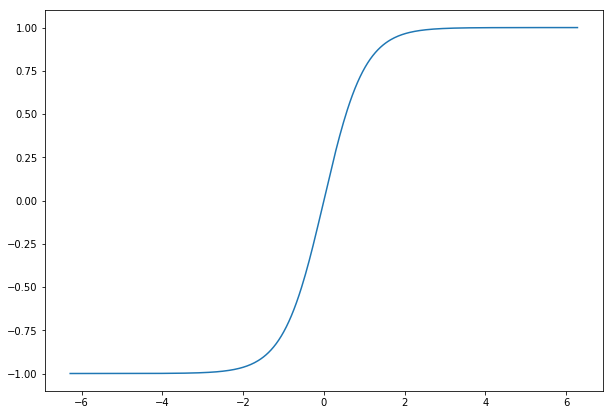

In [21]:
x = np.linspace(-2*np.pi, 2*np.pi, 400)
y = np.tanh(x)
fig, ax = plt.subplots()
ax.plot(x, y)

You can plot multiple subplots in the same figure, or multiple functions in the same subplot

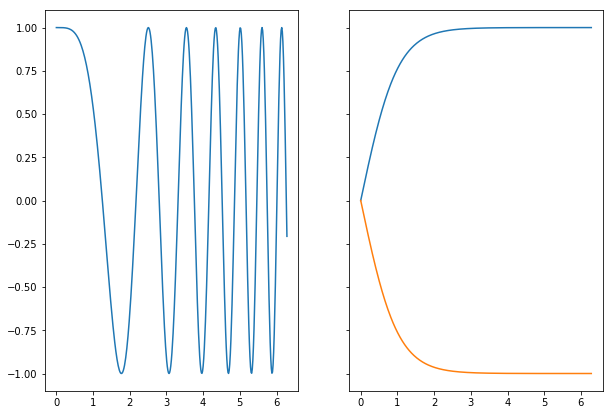

In [22]:
x = np.linspace(0, 2*np.pi, 400)
y1 = np.tanh(x)
y2 = np.cos(x**2)
fig, axes = plt.subplots(1, 2, sharey=True)
axes[1].plot(x, y1)
axes[1].plot(x, -y1)
axes[0].plot(x, y2)

Matplotlib also comes with a lot of different options to customize, the colors, the labels, the axes, etc.

For instance, see this [introduction to matplotlib](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)

## Scikit-learn 

Scikit-learn includes a number of features and utilities to kickstart your journey in Machine Learning. 

### A toy example

In [23]:
from sklearn.datasets import make_blobs

In [24]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
X[:5], y[:5]

(array([[0.4666179 , 3.86571303],
        [2.84382807, 3.32650945],
        [0.61121486, 2.51245978],
        [3.81653365, 1.65175932],
        [1.28097244, 0.62827388]]), array([0, 0, 0, 1, 1]))

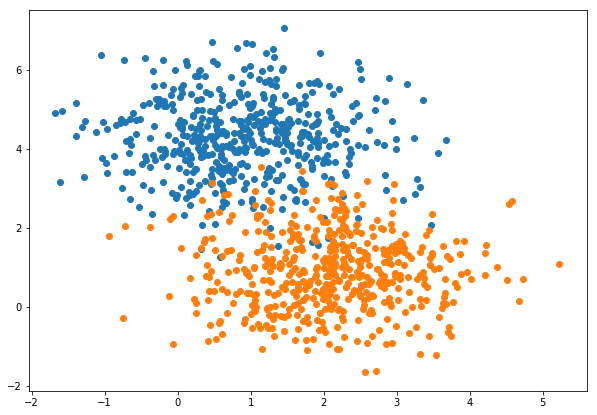

In [25]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

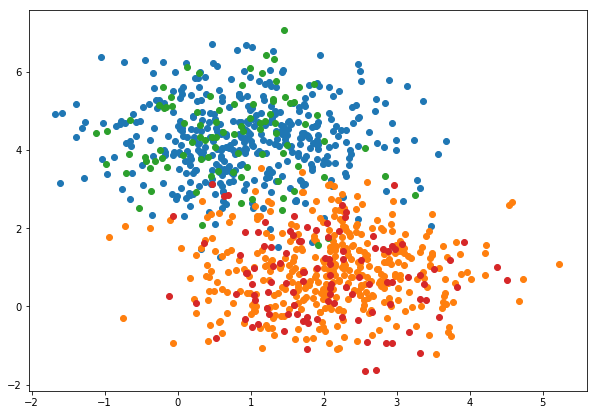

In [28]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])

Sklearn uses a uniform and very consistent API, making it easy to switch algorithms

For instance, training and predicting with a perceptron.

In [29]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [30]:
clf = Perceptron(max_iter=40, random_state=0)
# clf = LinearSVC(max_iter=40, random_state=0)

In [31]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.8900


In [32]:
theta = clf.coef_[0]
theta_0 = clf.intercept_

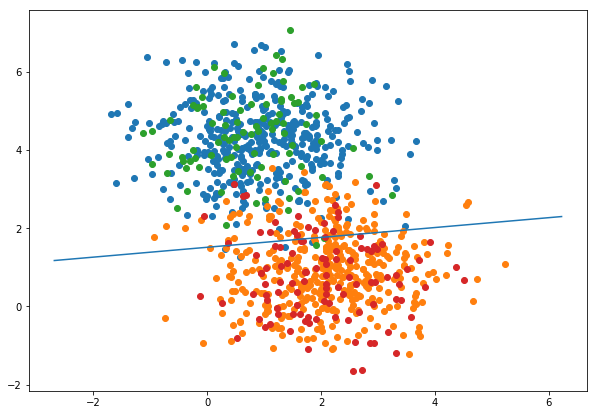

In [33]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])
x_bnd = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1,  400)
y_bnd = - x_bnd * (theta[0] /theta[1]) - (theta_0 / theta[1])
ax.plot(x_bnd, y_bnd)

### Classify digits

In [34]:
# from sklearn.datasets import load_breast_cancer
# breast_cancer = load_breast_cancer()
# X, y = breast_cancer.data, breast_cancer.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
from sklearn.datasets import load_digits

In [36]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

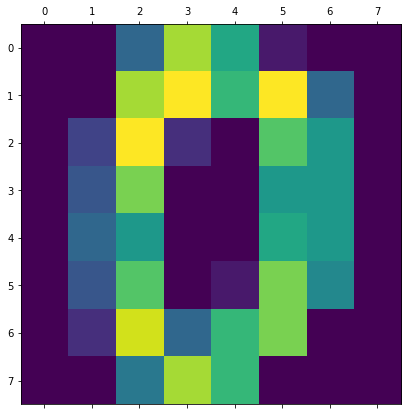

In [37]:
fig, ax = plt.subplots()
ax.matshow(digits.images[0])

In [38]:
X_train.shape

(1437, 64)

In [39]:
clf = Perceptron(max_iter=40, random_state=0)

In [40]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9389


In [41]:
clf = LinearSVC(C=1, random_state=0)

In [42]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9361


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, clf.predict(X_test))

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  1,  0,  5,  0],
       [ 0,  1, 33,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 38,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  2, 36]])

Scikit-learn also includes utilities to quickly compute a cross validation score...

In [45]:
clf = LinearSVC(C=1, random_state=0)
from sklearn.model_selection import cross_val_score
scores =  cross_val_score(clf, X_train, y_train, cv=5)
print("Mean: %.4f, Std: %.4f" % (np.mean(scores), np.std(scores)))

Mean: 0.9443, Std: 0.0127


In [46]:
clf = LinearSVC(C=0.1, random_state=0)
scores =  cross_val_score(clf, X_train, y_train, cv=5)
print("Mean: %.4f, Std: %.4f" % (np.mean(scores), np.std(scores)))

Mean: 0.9555, Std: 0.0101


... or to perform a grid search

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
clf = LinearSVC(random_state=0)
param_grid = {'C': 10. ** np.arange(-6, 4)}
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=3, return_train_score=True)

In [49]:
grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.8424657534246576, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.8719723183391004, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.9090909090909091, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.8426573426573427, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................. C=1e-06, score=0.897887323943662, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ................ C=1e-05, score=0.9075342465753424, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.0001, score=0.9683098591549296, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................. C=0.001, score=0.958904109589041, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................ C=0.001, score=0.9653979238754326, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................. C=0.001, score=0.965034965034965, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................. C=0.001, score=0.965034965034965, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ................ C=0.001, score=0.9788732394366197, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.9554794520547946, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.7s finished


In [50]:
print(grid_search.best_params_)

{'C': 0.001}


In [51]:
print(grid_search.best_score_)

0.9665970772442589


In [52]:
y_pred = grid_search.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9639


And a lot more features!

## Pandas

In [53]:
import pandas as pd

Pandas is a library that provides a set of tools for data analysis (Python Data Analysis Library). 

Pandas dataframes can be created by importing a CSV file (or TSV, or JSON, or SQL, etc.)

In [54]:
# df = pd.read_csv("file.csv")

Pandas dataframes can also be created directly from a dictionary of arrays.

In [55]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.01205668, 0.01181946, 0.01350636, 0.0240624 , 0.07824078,
       0.07585702, 0.07903461, 0.0707952 , 0.07080426, 0.07771964]), 'std_fit_time': array([0.00114782, 0.000415  , 0.00260798, 0.00211582, 0.00391445,
       0.00367253, 0.01020894, 0.00254889, 0.00194281, 0.01091164]), 'mean_score_time': array([0.000315  , 0.0003674 , 0.00044675, 0.00032883, 0.0003818 ,
       0.0006422 , 0.00233235, 0.00034857, 0.00037432, 0.00043726]), 'std_score_time': array([1.69350380e-05, 7.82364673e-05, 2.38030996e-04, 1.91510531e-05,
       6.47313424e-05, 2.40848679e-04, 3.99546450e-03, 1.76197621e-05,
       1.89130713e-05, 2.01997754e-04]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                   100.0, 1000.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.0

In [56]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012057,0.001148,0.000315,0.000017,1e-06,{'C': 1e-06},0.842466,0.871972,0.909091,0.842657,...,0.872651,0.027467,10,0.882969,0.880662,0.869679,0.881842,0.872507,0.877532,0.005383
1,0.011819,0.000415,0.000367,0.000078,1e-05,{'C': 1e-05},0.907534,0.913495,0.944056,0.902098,...,0.919972,0.015905,9,0.929258,0.931185,0.922676,0.932233,0.925412,0.928153,0.003594
2,0.013506,0.002608,0.000447,0.000238,0.0001,{'C': 0.0001},0.934932,0.941176,0.965035,0.940559,...,0.949896,0.013812,4,0.963319,0.964286,0.960035,0.960904,0.958369,0.961382,0.002159
3,0.024062,0.002116,0.000329,0.000019,0.001,{'C': 0.001},0.958904,0.965398,0.965035,0.965035,...,0.966597,0.006563,1,0.982533,0.982578,0.983493,0.980017,0.981787,0.982082,0.001165
4,0.078241,0.003914,0.000382,0.000065,0.01,{'C': 0.01},0.955479,0.961938,0.968531,0.961538,...,0.963814,0.005743,2,0.993886,0.993031,0.994787,0.992181,0.993929,0.993563,0.000887
5,0.075857,0.003673,0.000642,0.000241,0.1,{'C': 0.1},0.945205,0.972318,0.947552,0.961538,...,0.955463,0.010139,3,0.998253,0.996516,0.998262,0.996525,0.995663,0.997044,0.001039
6,0.079035,0.010209,0.002332,0.003995,1,{'C': 1.0},0.941781,0.961938,0.937063,0.954545,...,0.944328,0.012686,6,0.997380,0.997387,0.997394,0.995656,0.980919,0.993747,0.006449
7,0.070795,0.002549,0.000349,0.000018,10,{'C': 10.0},0.938356,0.965398,0.933566,0.951049,...,0.948504,0.011423,5,0.994760,0.992160,0.994787,0.991312,0.990460,0.992696,0.001780
8,0.070804,0.001943,0.000374,0.000019,100,{'C': 100.0},0.928082,0.944637,0.933566,0.947552,...,0.938761,0.007159,8,0.995633,0.989547,0.995656,0.987837,0.991327,0.992000,0.003174
9,0.077720,0.010912,0.000437,0.000202,1000,{'C': 1000.0},0.938356,0.955017,0.930070,0.954545,...,0.944328,0.009568,6,0.996507,0.984321,0.995656,0.993918,0.987858,0.991652,0.004751


Pandas columns are also Numpy arrays, so they obey to the same indexing magic

In [57]:
df[df['param_C'] < 0.01]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012057,0.001148,0.000315,0.000017,1e-06,{'C': 1e-06},0.842466,0.871972,0.909091,0.842657,...,0.872651,0.027467,10,0.882969,0.880662,0.869679,0.881842,0.872507,0.877532,0.005383
1,0.011819,0.000415,0.000367,0.000078,1e-05,{'C': 1e-05},0.907534,0.913495,0.944056,0.902098,...,0.919972,0.015905,9,0.929258,0.931185,0.922676,0.932233,0.925412,0.928153,0.003594
2,0.013506,0.002608,0.000447,0.000238,0.0001,{'C': 0.0001},0.934932,0.941176,0.965035,0.940559,...,0.949896,0.013812,4,0.963319,0.964286,0.960035,0.960904,0.958369,0.961382,0.002159
3,0.024062,0.002116,0.000329,0.000019,0.001,{'C': 0.001},0.958904,0.965398,0.965035,0.965035,...,0.966597,0.006563,1,0.982533,0.982578,0.983493,0.980017,0.981787,0.982082,0.001165


They also provide most functionality you would expect as database user (`df.sort_values`, `df.groupby`, `df.join`, `df.concat`, etc.)

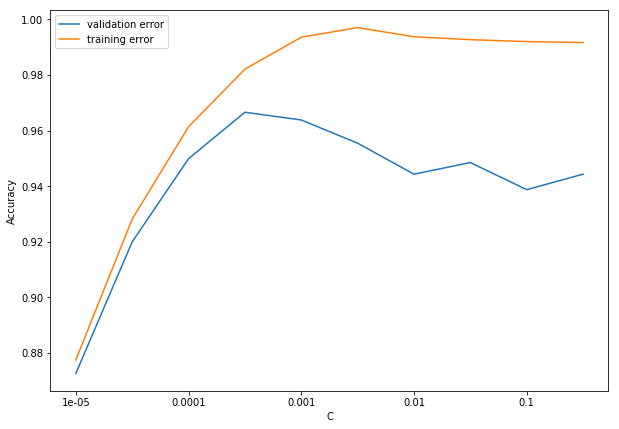

In [58]:
fig, ax = plt.subplots()
ax.plot(df['mean_test_score'], label="validation error")
ax.plot(df['mean_train_score'], label="training error")
ax.set_xticklabels(df['param_C'])
ax.set_xlabel("C")
ax.set_ylabel("Accuracy")
ax.legend(loc='best');

## Other packages 

Other packages that didn't make the cut:
- Plotly and Seaborn: two other plotting libraries
- Scipy: a science library built on top of Numpy
- Scrapy: a web crawling library
- pdb: a debugger for python (not ML-specific but terribly useful)
- tqdm: a progress bar (not ML-specific)

Next time:
- Pytorch